In [92]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy.stats as stat
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
# from sklearn 

In [93]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [94]:
df.drop(['sex','smoker','day','time'],axis=1,inplace=True)

In [95]:
df.shape

(244, 3)

In [96]:
df.isnull().sum()

total_bill    0
tip           0
size          0
dtype: int64

In [97]:
X=df.drop('total_bill',axis=1)
y=df['total_bill']

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

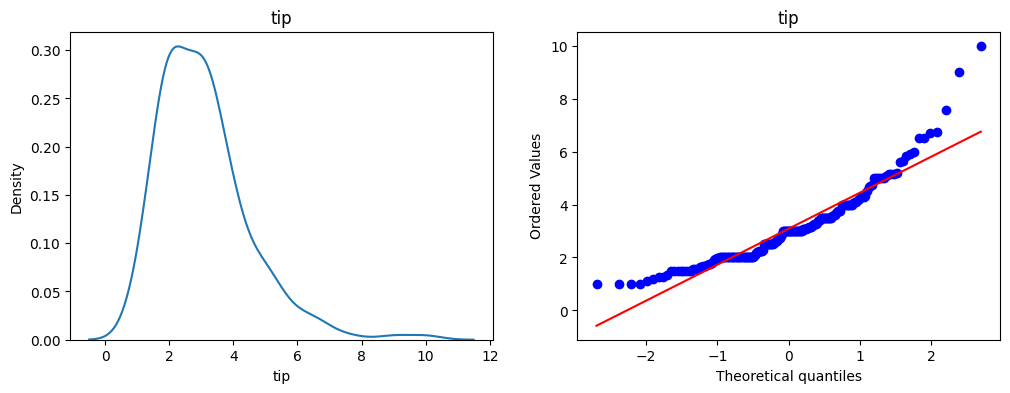

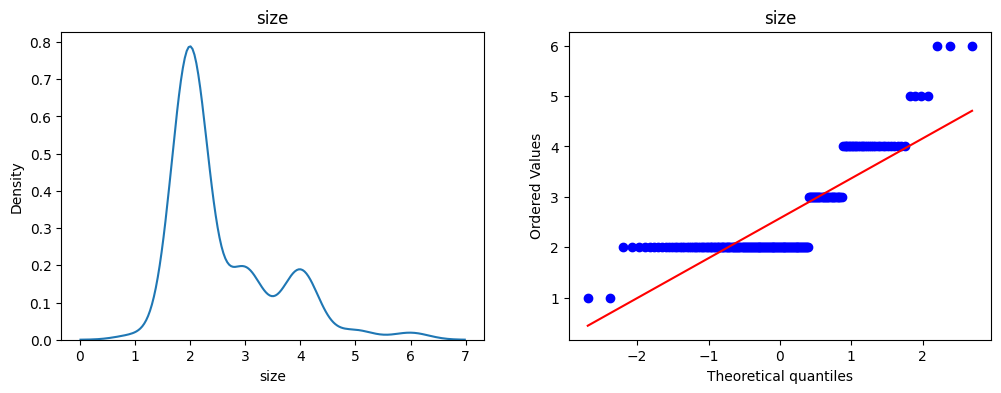

In [99]:
for col in X_train.columns:
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    sns.kdeplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stat.probplot(X_train[col],dist='norm',plot=plt)
    plt.title(col)

In [100]:
boxcox=PowerTransformer(method='box-cox')
# value add x_train becuase I want zero value with zero point something value 
#e.g if value is zero after add sumpoint then value 0.02345 becuase not support value zero boxcox
X_train_transform=boxcox.fit_transform(X_train+0.00001)
X_test_transform=boxcox.transform(X_test+0.0001)

In [101]:
X_train_transform

array([[-0.06312758, -0.58307577],
       [-0.7390254 , -0.58307577],
       [ 0.81611828, -0.58307577],
       [ 1.08203315,  1.48556084],
       [-0.7390254 , -0.58307577],
       [ 0.51966533, -0.58307577],
       [-0.7736236 , -0.58307577],
       [ 1.38514727, -0.58307577],
       [-1.08481882, -0.58307577],
       [-0.04630262,  0.7751974 ],
       [ 0.16149886,  0.7751974 ],
       [ 1.38079188,  1.92601736],
       [ 0.51317617, -0.58307577],
       [ 1.59240091, -0.58307577],
       [-0.25716983, -0.58307577],
       [-0.76203131, -0.58307577],
       [ 0.86091099, -0.58307577],
       [-0.67139477, -0.58307577],
       [-2.40667356, -4.37071367],
       [ 0.45389202,  0.7751974 ],
       [ 0.50013987,  0.7751974 ],
       [-0.7736236 ,  1.48556084],
       [ 0.16149886,  1.92601736],
       [-0.07158831, -0.58307577],
       [ 0.16149886, -0.58307577],
       [ 0.16149886, -0.58307577],
       [ 0.16149886,  1.48556084],
       [ 0.62713475,  1.48556084],
       [ 1.1846807 ,

In [102]:
# box cox lambda value each column 
pd.DataFrame({'col':X_train.columns,'lambda':boxcox.lambdas_})

,col,lambda
0,tip,-0.038782
1,size,-0.872628


In [103]:
X_train_transformed=pd.DataFrame(X_train_transform,columns=X_train.columns)

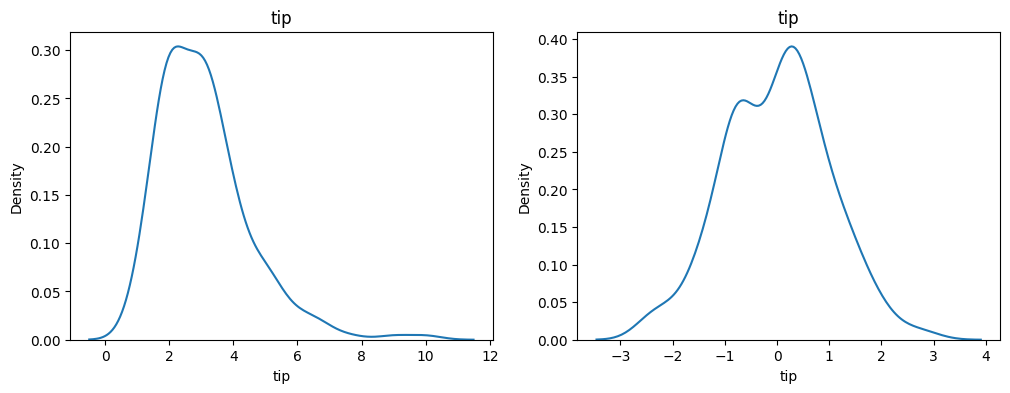

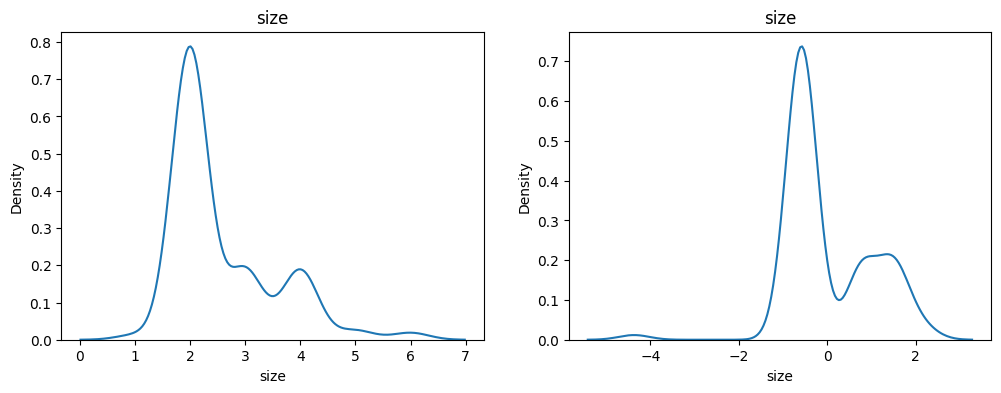

In [104]:
for col in X_train_transformed.columns:
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    sns.kdeplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.kdeplot(X_train_transformed[col])
    plt.title(col)

In [105]:
yeojohnson=PowerTransformer()
X_train_transform=yeojohnson.fit_transform(X_train)
X_test_transform=yeojohnson.transform(X_test)
X_train_transformed=pd.DataFrame(X_train_transform,columns=X_train.columns)

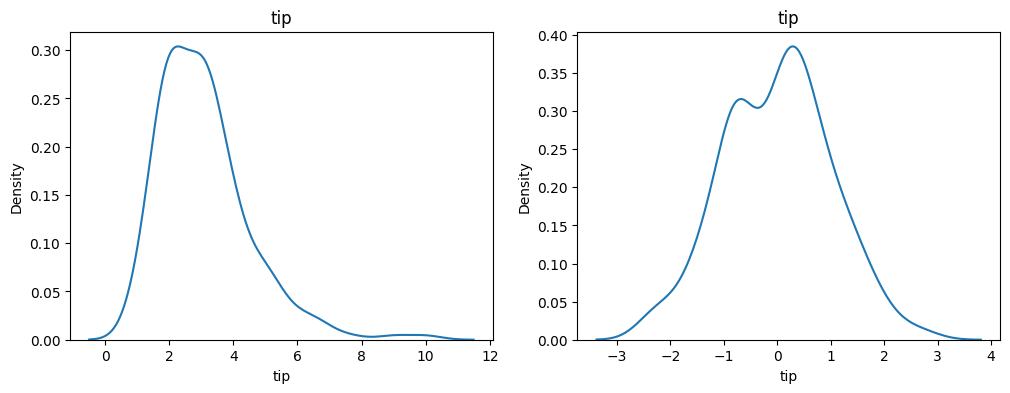

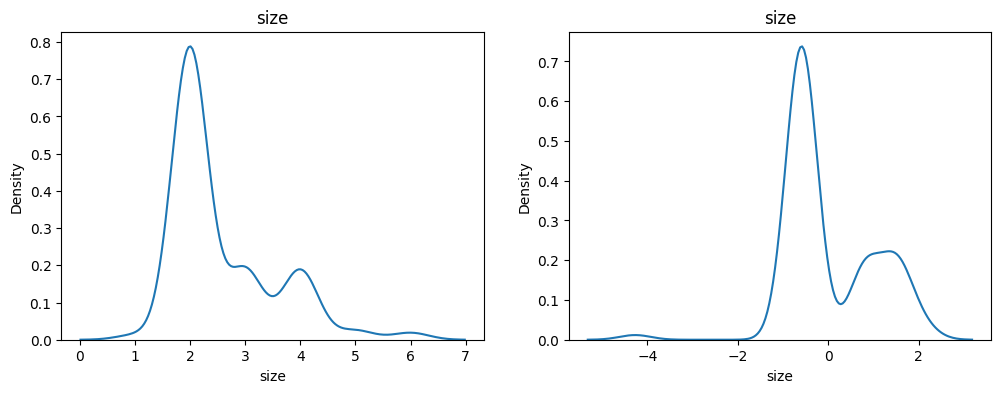

In [106]:
for col in X_train_transformed.columns:
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    sns.kdeplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.kdeplot(X_train_transformed[col])
    plt.title(col)